<a href="https://colab.research.google.com/github/FulISun/AI_ML-DL_Intermediate/blob/main/machine_learning/04_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn을 이용한 k 최근접 이웃

## 개요

- knn 알고리즘은 입력된 새로운 데이터와 가장 비슷한 k개 학습데이터를 찾아서 그 데이터의 평균이나 투표 결과를 결과값으로 되돌려주는 알고리즘
- => k개 주변의 평균값! 따라서 k가 작을수록 데이터에 민감하게 반응함 (아래 예시에서 확인 할 것)


<img src="https://kr.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif" width=300/>

- 분류 문제인 경우 위 그림처럼 가장 가까운 데이터를 찾고 많은 쪽에 속하도록 분류


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png" width=400/>

- 회귀문제인 경우 가까운 데이터의 타겟 평균값이 결과가 됨

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터 로드

- 머신러닝은 크게 분류문제와 회귀문제로 구성되므로 여기서 간단한 분류문제에 대한 데이터, 회귀문제에 대한 데이터를 로드

In [67]:
# 여기부터 시작!
D = np.load('basic_clfreg.npz')

In [68]:
print(type(D))

<class 'numpy.lib.npyio.NpzFile'>


In [69]:
X_clf = D['X_clf']
y_clf = D['y_clf']

X_reg = D['X_reg']
y_reg = D['y_reg']

## 데이터 확인

In [70]:
print(X_clf.shape, y_clf.shape, X_reg.shape, y_reg.shape)

(26, 2) (26,) (40, 1) (40,)


### 분류데이터

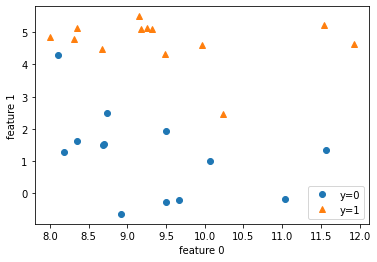

In [71]:
# 분류용 데이터를 타겟별로 나눠서 그리기
fig = plt.figure()
ax = plt.axes()

ax.plot(X_clf[y_clf==0][:,0], X_clf[y_clf==0][:,1], 'o', label='y=0') # x축: y=0일 때 X1, y축: y=0일 때 X2 
ax.plot(X_clf[y_clf==1][:,0], X_clf[y_clf==1][:,1], '^', label='y=1') # x축: y=1일 때 X1, y축: y=1일 때 X2

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')

ax.legend()

plt.show()

### 회귀 데이터

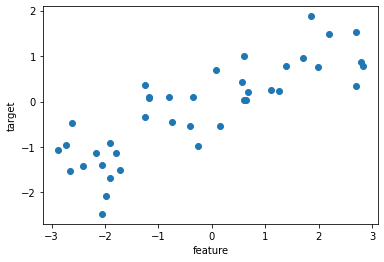

In [72]:
# 회귀용 데이터를 타겟별로 나눠서 그리기
fig = plt.figure()
ax = plt.axes()

ax.plot(X_reg, y_reg, 'o')

ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

### 데이터셋 split

- 머신러닝을 학습할 때 학습에 사용하는 데이터와 학습된 모델이 얼마나 잘 동작하는지 테스트할 데이터를 나누게 됨

In [73]:
# train_test_split
from sklearn.model_selection import train_test_split

In [74]:
# 데이터 분리
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, random_state=66)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=66)

In [75]:
print(X_clf_train.shape, X_clf_test.shape, y_clf_train.shape, y_clf_test.shape)
print(X_reg_train.shape, X_reg_test.shape, y_reg_train.shape, y_reg_test.shape)

(19, 2) (7, 2) (19,) (7,)
(30, 1) (10, 1) (30,) (10,)


## k-최근접 이웃 k-Nearest Neighbors

### 분류

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# fit
clf = KNeighborsClassifier(n_neighbors=3) # 몇 개로 나눌건지
clf.fit(X_clf_train, y_clf_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
print(f"test set 예측:{clf.predict(X_clf_test)}") # test set 7개에 대한 예측값

test set 예측:[0 0 1 1 0 1 0]


In [79]:
print(f"test set 정확도:{clf.score(X_clf_test, y_clf_test):.2f}")

test set 정확도:0.86


In [80]:
# 이웃 수를 1, 3, 9로 바꿔가면서 test set에 대한 정확도 확인

for n in [1,3,9]:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_clf_train, y_clf_train)

    print(f"{n} 이웃모델 test set 정확도:{clf.score(X_clf_test, y_clf_test):.2f}")

    # 정확도 달라지지 않는 이유 확인해보기 

1 이웃모델 test set 정확도:0.86
3 이웃모델 test set 정확도:0.86
9 이웃모델 test set 정확도:0.86


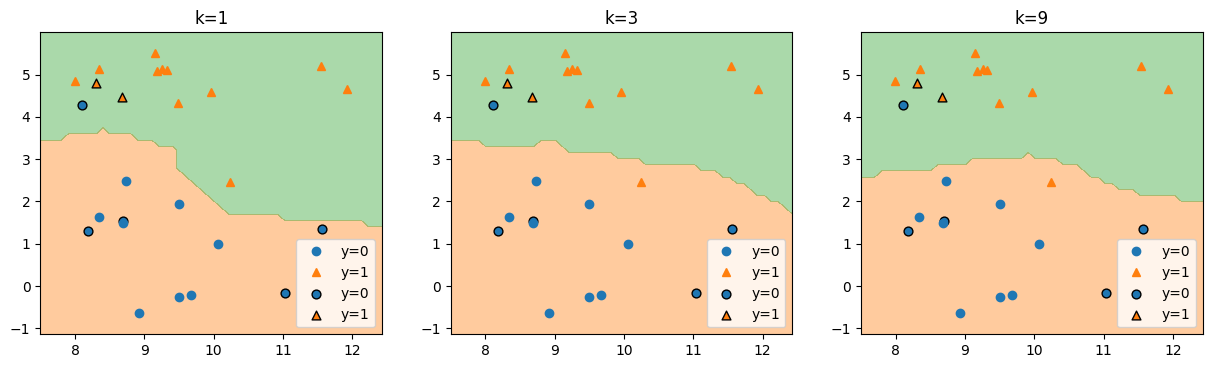

In [81]:
# 처음 한 번만 그림으로 확인

# 왜 똑같은지 확인하기 위해 결정경계 그리기
ngrid = 50
eps = 0.5

# 데이터의 최소, 최대값보다 eps만큼 바깥 영역에서 그리드 짜기
x_min, x_max = X_clf[:, 0].min() - eps, X_clf[:, 0].max() + eps # x축: X1
y_min, y_max = X_clf[:, 1].min() - eps, X_clf[:, 1].max() + eps # y축: X2
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원으로 펼치고 컨투어 그릴 레벨 설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1]

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3, dpi=100)

for i, n in enumerate([1,3,9]):
    # 모델 생성, fit
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_clf_train, y_clf_train)

    # X_grid (그림 그리는 공전 전부)에 대해서 예측
    decision_values = clf.predict(X_grid)

    # 결정경계 그리기
    ax[i].contourf(X1, X2, decision_values.reshape(X1.shape),
                  levels=levels, colors=['C1', 'C2'], alpha=0.4) #contour는 선으로 그려지고 contourf는 채워짐

    # 학습 데이터 그리기
    ax[i].plot(X_clf_train[y_clf_train==0][:,0],
               X_clf_train[y_clf_train==0][:,1], 'o', label='y=0') # x축:X1, y축:X2
    ax[i].plot(X_clf_train[y_clf_train==1][:,0],
               X_clf_train[y_clf_train==1][:,1], '^', label='y=1')
    
    # 테스트 데이터 그리기
    ax[i].scatter(X_clf_test[y_clf_test==0][:,0],
                  X_clf_test[y_clf_test==0][:,1], marker='o', edgecolor='k',
                  s=40, label='y=0')
    ax[i].scatter(X_clf_test[y_clf_test==1][:,0],
                  X_clf_test[y_clf_test==1][:,1], marker='^', edgecolor='k',
                  s=40, label='y=1')
    ax[i].set_title(f"k={n}")
    ax[i].legend()

plt.show()                         

- 볼드 테두리는 테스트 데이터라 학습할 때 못 본 데이터임. 테스트 데이터만 놓고 보면 k를 바꿔도 달라지는 게 없음.
- k=1일 땐 결정경계가 구불구불함. 즉, 주변 데이터에 민감하게 반응함. k=3일 땐 주변 3개의 평균이기 때문에 나름 부드러움. k=9는 완전 부드러움. => 따라서 k가 클수록 결정경계가 부드러워짐

### 회귀

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
# fit
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_reg_train, y_reg_train)

KNeighborsRegressor(n_neighbors=3)

In [84]:
print(f"test set R^2 score: {reg.score(X_reg_test, y_reg_test):.2f}")

test set R^2 score: 0.70


- 회귀의 경우 성능 지표는 목적함수가 있는 경우 목적함수값으로 사용하나 여기서는 결정계수로 불리는 $R^2$을 주로 사용

$$
R^2 = 1 - \frac{\sum_i (y_i- \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- 위 식은 데이터와 평균과의 차이 합에 대한 예측과의 차이의 비율

- 그냥 평균으로 예측한다면 0, 평균보다 낫다면 0보다 큰값, 예측과 데이터의 오차가 없다면 1

In [85]:
# 이웃수를 1,3,9로 바꿔가며 test set에 대한 R^2 score
for n in [1,3,9]:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_reg_train, y_reg_train)

    print(f"{n} test set R^2 score: {reg.score(X_reg_test, y_reg_test):.2f}")

1 test set R^2 score: 0.57
3 test set R^2 score: 0.70
9 test set R^2 score: 0.72


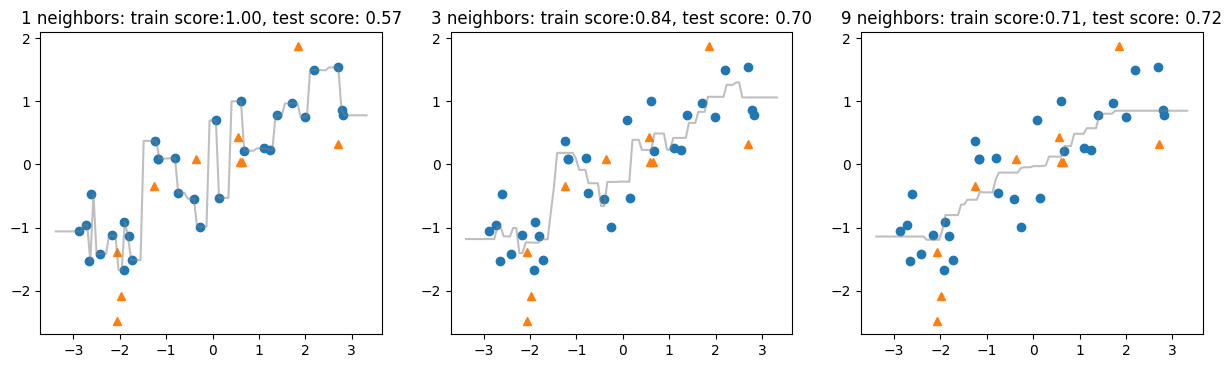

In [86]:
# 그림으로 확인

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3, dpi=100)
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

for i, n in enumerate([1,3,9]):

    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_reg_train, y_reg_train) # fitting
    
     # X_grid (그림 그리는 공전 전부)에 대해서 예측
    pred = reg.predict(x.reshape(-1,1)) # prediction
    
    ax[i].plot(x, pred, color='0.5', zorder=20, alpha=0.5) # 선으로 표시된 그래프
    ax[i].plot(X_reg_train, y_reg_train, 'o', label='train')
    ax[i].plot(X_reg_test, y_reg_test, '^', label='test')

    ax[i].set_title(f"{n} neighbors: \
train score:{reg.score(X_reg_train, y_reg_train):.2f}, \
test score: {reg.score(X_reg_test, y_reg_test):.2f}")
    
plt.show()

k=1일 땐 모든 트레이닝 데이터를 다 학습시키기 때문에 오버피팅 되어서 테스트셋에 맞지 않음

## 실습: real data

### 분류: 유방암 데이터

- 아래 로드된 유방암 데이터의 특성을 조사하고 최적의 n_neighbors 구하기

In [87]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state =66
)

In [88]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [89]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


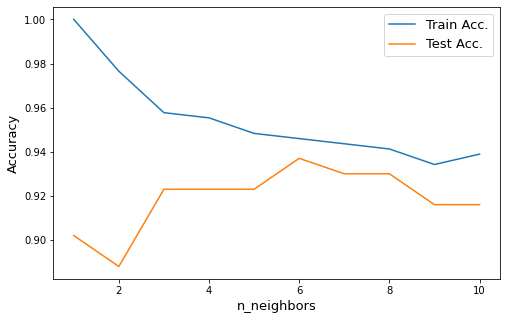

In [90]:
training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

fig = plt.figure(figsize=(8,5))
ax = plt.axes()

#-------------------------------------------------------
for n_neighbors in neighbors_settings:

    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # training set 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # test set 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
#-------------------------------------------------------

# 저장된 정확도를 n_neighbors에 대해서 그림
ax.plot(neighbors_settings, training_accuracy, label = 'Train Acc.')
ax.plot(neighbors_settings, test_accuracy, label = 'Test Acc.')

ax.set_ylabel("Accuracy", size=13)
ax.set_xlabel("n_neighbors", size=13)
ax.legend(fontsize=13)

plt.show()

- 이런 plot을 validation curve 라고 부름
- 6까지는 training이 줄어들고 test가 올라감 => 일반화 성능이 좋아짐
- 6을 넘어서면 둘 다 떨어짐. => 6이 최적

In [91]:
# 실제 양성 음성을 출력하는 함수 만들기
best_clf = KNeighborsClassifier(n_neighbors=6)
best_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [92]:
best_clf.score(X_test, y_test)

0.9370629370629371

그런데 우리는 6이란 파라미터를 튜닝하기 위해서 test데이터도 사용해버렸기 때문에 정석대로면 아예 새로운 데이터 셋이 필요함. => 그래서 k-fold cv하는 것

In [103]:
def predict_breast_cancer(x, model):
    target = np.array(['Malignant', 'Benign']) # 타겟값의 이름을 정함 (음성, 양성)

    pred = model.predict(x)
    print(pred)

    return target[pred]

In [104]:
i = 10 # i번째 데이터 예측하기
print(X_test[i:i+1]) # 그냥 [i]는 인덱싱이라 차원이 축소됨!! 슬라이싱 해서 차원 유지하기!!
predict_breast_cancer(X_test[i:i+1], best_clf)

[[1.674e+01 2.159e+01 1.101e+02 8.695e+02 9.610e-02 1.336e-01 1.348e-01
  6.018e-02 1.896e-01 5.656e-02 4.615e-01 9.197e-01 3.008e+00 4.519e+01
  5.776e-03 2.499e-02 3.695e-02 1.195e-02 2.789e-02 2.665e-03 2.001e+01
  2.902e+01 1.335e+02 1.229e+03 1.563e-01 3.835e-01 5.409e-01 1.813e-01
  4.863e-01 8.633e-02]]
[0]


array(['Malignant'], dtype='<U9')

### 회귀: 보스톤 집값 데이터

- 아래 로드된 보스톤 집값 데이터 특성을 조사하고 최적의 n_neighbors를 찾기

In [105]:
from sklearn.datasets import load_boston

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=66
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [106]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [108]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston = {'data':data, 'target':target}

# data split
X_train, X_test, y_train, y_test = train_test_split(
    boston['data'], boston['target'], random_state=0
)

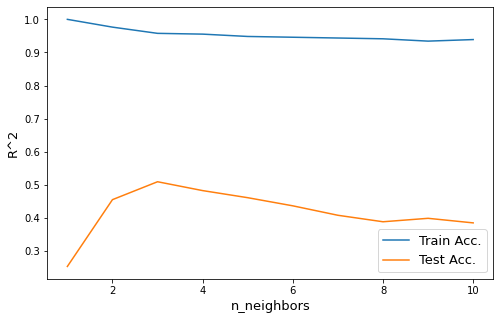

In [110]:
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors 적용
neighbors_settings = range(1, 11)

fig = plt.figure(figsize=(8,5))
ax = plt.axes()

#--------------------------------------------------
for n_neighbors in neighbors_settings:

    # 모델생성
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    # fitting
    reg.fit(X_train, y_train)
    # training set acc
    train_accuracy.append(reg.score(X_train, y_train))
    # test set acc
    test_accuracy.append(reg.score(X_test, y_test))
#--------------------------------------------------

# 저장된 정확도를 n_neighbors에 대해서 그림
ax.plot(neighbors_settings, training_accuracy, label='Train Acc.')
ax.plot(neighbors_settings, test_accuracy, label='Test Acc.')

ax.set_ylabel("R^2", size=13)
ax.set_xlabel("n_neighbors", size=13)
ax.legend(fontsize=13)

plt.show()

- test acc가 3까지 올라가다가 떨어짐.. 그래도 0.5밖에 안됨 -> 앙상블 써야함! 

## 장단점

- 장점
    - 이해하기 쉬움, 알고리즘에 복잡한 수학이 등장하지 않음
    - 가장 먼저 시도해볼 수 있는 간결함
    - 모델 구축이 빠름, 단 데이터가 많으면 예측도 그에 비례해서 느려짐
     
- 단점
    - 거리를 기반으로 하므로 데이터 정규화, 표준화 같은 전처리 중요
    - 데이터의 특성수가 많아지면 '차원의 저주'로 잘 동작하지 않음